In [19]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


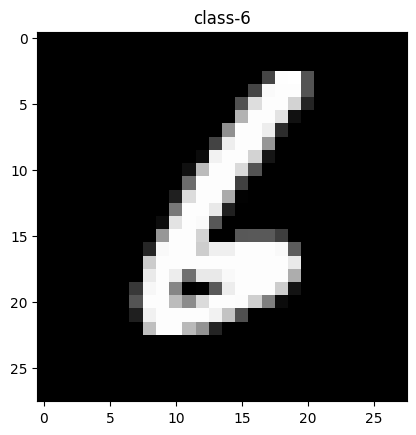

Train image 24785-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  70
  254 255  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  69 250
  253 253  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  81 222 253
  253 212  37   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 179 253 253
  228  17   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 144 253 253 237
   44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/shubham/shubham ml/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:
# Your validation set extraction script/code \
train_images_flatten = train_images.flatten().reshape(60000,28*28).astype('float64') 
test_images_flatten = test_images.flatten().reshape(10000,28*28).astype('float64') 


validation_size = int(len(train_images_flatten) * 0.2)

# Split the data into training and validation sets
val_images= train_images_flatten[:validation_size]
val_labels=train_labels[:validation_size]
train_images_new= train_images_flatten[validation_size:]
train_labels_new=train_labels[validation_size:]
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images_new.shape, train_labels_new.shape))
print('val data(X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

Train data (X) size: (48000, 784), and labels (Y) size: (48000,)
val data(X) size: (12000, 784), and labels (Y) size: (12000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [4]:
# # # Your k-NN algorithm script/code 
def manhattan_distance(point1, point2):
        return np.sum(np.abs(point1 - point2))

def euclidean_distance( point1, point2):
        return np.sqrt(np.sum((point1 - point2)**2))

def chebyshev_distance( point1, point2):
        return np.max(np.abs(point1 - point2))
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, train_images_new, train_labels_new):
        self.train_images_new=train_images_new
        self.train_labels_new = train_labels_new

    def predict(self, X_val):
        predictions = []
        for sample in X_val:
            distances = [euclidean_distance(sample, x) for x in self.train_images_new]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.train_labels_new[nearest_indices]
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)
            prediction = unique_labels[np.argmax(counts)]
            predictions.append(prediction)
        return predictions

    def evaluate(self, X_val, y_val):
        predictions = self.predict(X_val)
        accuracy = np.mean(predictions == y_val)
        return accuracy
knn=KNN(k=3)
knn.fit(train_images_flatten,train_labels)
val=knn.evaluate(test_images_flatten,test_labels)
print("Validation Accuracy for k =3",val)

#in test case my accuracy is 97.05% for k=3 and p=2

Validation Accuracy for k =3 0.9705


In [9]:
#just take the out put in a dic
validation_accuracies_ecu_dist = {
    1: 0.97,
    3: 0.97175,
    5: 0.96975,
    7: 0.9680833333333333,
    9: 0.9655833333333333,
    11: 0.9646666666666667,
    13: 0.9635833333333333,
    15: 0.962,
    17: 0.9608333333333333,
    19: 0.9596666666666667,
    21: 0.9591666666666666,
    23: 0.9584166666666667,
    25: 0.9565833333333333
}
validation_accuracies_man_dis={
    1: 0.963,
    3: 0.96475,
    5: 0.9635,
    7: 0.9625,
    9: 0.9596666666666667,
    11: 0.957,
    13: 0.9565,
    15: 0.95525,
    17: 0.9545,
    19: 0.95175,
    21: 0.9511666666666667,
    23: 0.9503333333333334,
    25: 0.9485}
validation_accuracies_cheb_dis = {
    1: 0.81375,
    3: 0.7978333333333333,
    5: 0.8035833333333333,
    7: 0.7975,
    9: 0.7913333333333333,
    11: 0.79125,
    13: 0.7889166666666667,
    15: 0.7894166666666667,
    17: 0.7879166666666667,
    19: 0.7819166666666667,
    21: 0.7793333333333333,
    23: 0.7770833333333333,
    25: 0.7760833333333333
}

#format is (p,k,accu)
validation_accuracies_ecu_dist_triplet = [[1, k, v] for k, v in validation_accuracies_ecu_dist.items()]
validation_accuracies_man_dis_triplet=[[2, k, v] for k, v in validation_accuracies_man_dis.items()]
validation_accuracies_cheb_dis_triplet = [[np.inf, k, v] for k, v in validation_accuracies_cheb_dis.items()]

all_triplets =np.array(validation_accuracies_ecu_dist_triplet + validation_accuracies_man_dis_triplet + validation_accuracies_cheb_dis_triplet)


print(all_triplets)



[[ 1.          1.          0.97      ]
 [ 1.          3.          0.97175   ]
 [ 1.          5.          0.96975   ]
 [ 1.          7.          0.96808333]
 [ 1.          9.          0.96558333]
 [ 1.         11.          0.96466667]
 [ 1.         13.          0.96358333]
 [ 1.         15.          0.962     ]
 [ 1.         17.          0.96083333]
 [ 1.         19.          0.95966667]
 [ 1.         21.          0.95916667]
 [ 1.         23.          0.95841667]
 [ 1.         25.          0.95658333]
 [ 2.          1.          0.963     ]
 [ 2.          3.          0.96475   ]
 [ 2.          5.          0.9635    ]
 [ 2.          7.          0.9625    ]
 [ 2.          9.          0.95966667]
 [ 2.         11.          0.957     ]
 [ 2.         13.          0.9565    ]
 [ 2.         15.          0.95525   ]
 [ 2.         17.          0.9545    ]
 [ 2.         19.          0.95175   ]
 [ 2.         21.          0.95116667]
 [ 2.         23.          0.95033333]
 [ 2.         25.        

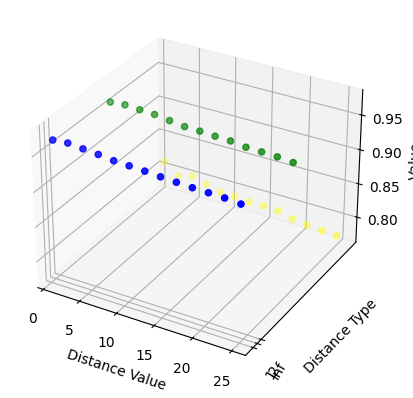

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colors = ['blue' if x[0] == 1 else 'green' if x[0] == 2 else 'yellow' for x in all_triplets]
labels = ['Manhattan' if x[0] == 1 else 'Euclidean' if x[0] == 2 else 'Chebyshev' for x in all_triplets]
x = [x[1] for x in all_triplets]
y = [labels.index(label) for label in labels] 
z = [x[2] for x in all_triplets]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors)
ax.set_xlabel('Distance Value')
ax.set_ylabel('Distance Type')
ax.set_zlabel('Value')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['1', '2', 'inf'],rotation=60)
plt.show()
